# Bellabeat Case Study 
## Using SQL,Excel,Tableau

### <font color='6CABBDD'>Table of Contents</font>
* [Introduction](#Introduction)
* [1. ASK Phase:](#ask) 
* [2.Prepare Phase](#Prepare)
* [3.Process Phase](#Process)
    * [3.1 Data Organization](#DataOrganization)
    * [3.2 Data Cleaning](#DataCleaning)
* [4. Analyze and Share Phase](#AnalyzeandShare)
    * [4.1 User Usage of Wearbles](#userusageofwearbles) 
    * [4.2 Calories and Steps](#CaloriesAndSteps)
    * [4.3 Sleep Analysis](#SleepAnalysis)
* [5. Act Phase](#act)

   


## Introduction
Bellabeat is a successful company, but they are looking forward to being even more successful, Sršen -cofounder of the company- knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy. So I was asked to concentrate on  Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices, this analysis would help guide marketing strategy for the company, I am going to present this insights to executive team alongside marketing data team. 
### Bellabeats Products 
The company’s wearable products include:
1. **Ivy** – “a health tracker disguised as smart jewelry” 
2. **Time** – “an elegant hybrid wellness watch” 
3. **Leaf** – available in three styles: chakra, urban, & crystal and can be worn as a necklace, bracelet or clip. This was Bellabeat’s classic wellness tracker. 
4. **Spring** – a “smart water bottle” designed to track your drinking / hydration habits. 

All of the company’s wearables sync to their Bellabeat app where members can check their metrics. The wearables track activity (steps taken, distanced traveled, calories burned and activity minutes) & sleep and through the app you can also track your menstrual cycle, hydration (if not using Spring) & meditation. Their IVY wearable also tracks heart rate metrics. 



<a id="ask"></a>
## 1.ASK Phase: 

### business Task: 
identifying trends in fitbit devices usage, and how these trends might Influence Bellabeat's Marketing Strategy
### Stakeholders:
1. **Urška Sršen** – Bellabeat’s cofounder and Chief Creative Officer 
2. **Sando Mur** – Mathematician and Bellabeat’s cofounder
3. **Bellabeat’s marketing analytics team** – a team of data analytics 

<a id="Prepare"></a>
## 2.Prepare Phase :
#### 1-I downloaded this dataset were downloaded from [**FitBit Fitness Tracker Data.**](https://www.kaggle.com/datasets/arashnic/fitbit),it's uploaded by uploaded by Möbius
> These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 12.04.2016-12.05.2016 (31 days).

> 33 eligible Fitbit users consented to the submission of personal tracker data, incluing physical activity, heart rate, and sleep monitoring.

#### **2. Fitbit Data Concerns and data integrity:**
- 33 unique participants might be cosidiered a small sample size 
- data is from 2016 which is kind of outdated
- No separation of gender to focus on female user trends
- considering Bellabeat is targeting women, the sample size does not seperate males from females to focus on females more
-31 days might not be enough to detect patterns

#### **3.accessability and usage:**
The data is CC0: Public Domain meaning it is open-source and can be modified/used in any way by anyone.



<a id="Process"></a>

## 3. Process Phase

### data organization: <a id="DataOrganization"></a>
datasets Selected 
We have 33 csv files in this Dataset
For the casestudy analysis the following datasets were chosen:

* Daily_Activity_Merged
* Daily_Sleep_Merged
* (Hourly_Steps_Merged,Hourly_Intensity_Merged, Hourly_Calories_Merged) all these 3 and METs were combined using Power Query and I made a new csv file named HourlyActivity.csv
* (MinuteStepsNarrow,MinuteintensieisNarrow,Minute_caloriesNarrow) all these 3 files were combined to form a new csv called MinuteActivity.csv
* Heart_Rate_Merged
* Weight_Log_Merged

<a id="DataCleaning"></a>

### Data cleaning:
* In the basic cleaning process, I used **Excel** and excel power query to 
1. merge csv files and form HourlyActivity and Minute activity files in case we needed to use them for deeper analysis.
2. Checked for Dublicates in all files and found 3 dublicates in DaiylSleep file ,other files has no dublicates
3. Added WeekDay column for further analysis on weekday patterns
4. splitted Date and time Column in all files to form Date column and Time column
5. Formatted date data into MM/DD/YY date format 
6. checked for datatypes and transformed data to the propper datatype 
7. Formatted any time data into 00:00:00 format for consistency.


* In **SQL** 

After some basic cleaning on excel, I decided to work with SQL.I used Microsoft SQL server for this
1. I created a DB under localhost server
2.  I uploaded the csv files and double-checked datatypes again as some of them kept on changing even after convertig on excel
3. created tables under db called Bellabeat these tables are 
* DailyActivity,
* Heartrate_secods,
* HourlyActivity, 
* MinuteActivity
* sleepday
* weightlogInfo
3. User verification, I Used SQL's COUNT DISTICT query to double check the number of unique participants in each table:
* Daily_Activity - 33
* Daily_Sleep - 24
* Heart_Rate - 7
* Hourly_Activity - 33
* MinuteActivity - 27
* Weight_Log_Merged - 8

<a id="AnalyzeandShare"></a>

# Analyze and share Phase

<a id="userusageofwearbles"></a>
#### 4.1 User Usage of Wearbles 
First, 
I wanted to see 
* **1. how many times each of the users wore/used the FitBit tracker**:


In [ ]:

SELECT
       Number_of_times_logged_data, 
       COUNT(DISTINCT Id) AS Number_of_users
FROM ( 
  SELECT Id, 
  COUNT(Id) AS Number_of_times_logged_data 
  FROM `bellabeats-case-study-400103.case_Study.DailyActivity` 
  GROUP BY Id ) t 
GROUP BY Number_of_times_logged_data 
ORDER BY Number_of_times_logged_data DESC;


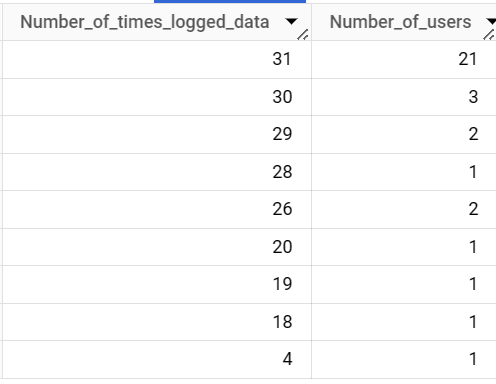

so,64% of users wore the fitbit tracker for the entire time period (04-12-2016 to 05-12-2016). When you add in the users who only missed 1-3 days that percentage can be 82% of users who logged data or wore their FitBit Tracker consistently over the month long period.




Next, Let's categorize the users by how much they wore their FitBit Fitness Tracker. I created three categories: 
* **Active User** - wore their tracker for 25-31 days 
* **Moderate User** - wore their tracker for 15-24 days
* **Light User** - wore their tracker for 0 to 14 days 


2. **segmenting users according to how muh they wore the tracker**

In [ ]:
--breaking down users according to how much they wore fitbit
SELECT Id,
COUNT(Id) AS Total_Logged_Uses,
CASE
WHEN COUNT(Id) BETWEEN 25 AND 31 THEN 'Active User'
WHEN COUNT(Id) BETWEEN 15 and 24 THEN 'Moderate User'
WHEN COUNT(Id) BETWEEN 0 and 14 THEN 'Light User'
END Fitbit_Usage_Type
FROM `bellabeats-case-study-400103.case_Study.DailyActivity`
GROUP BY Id;

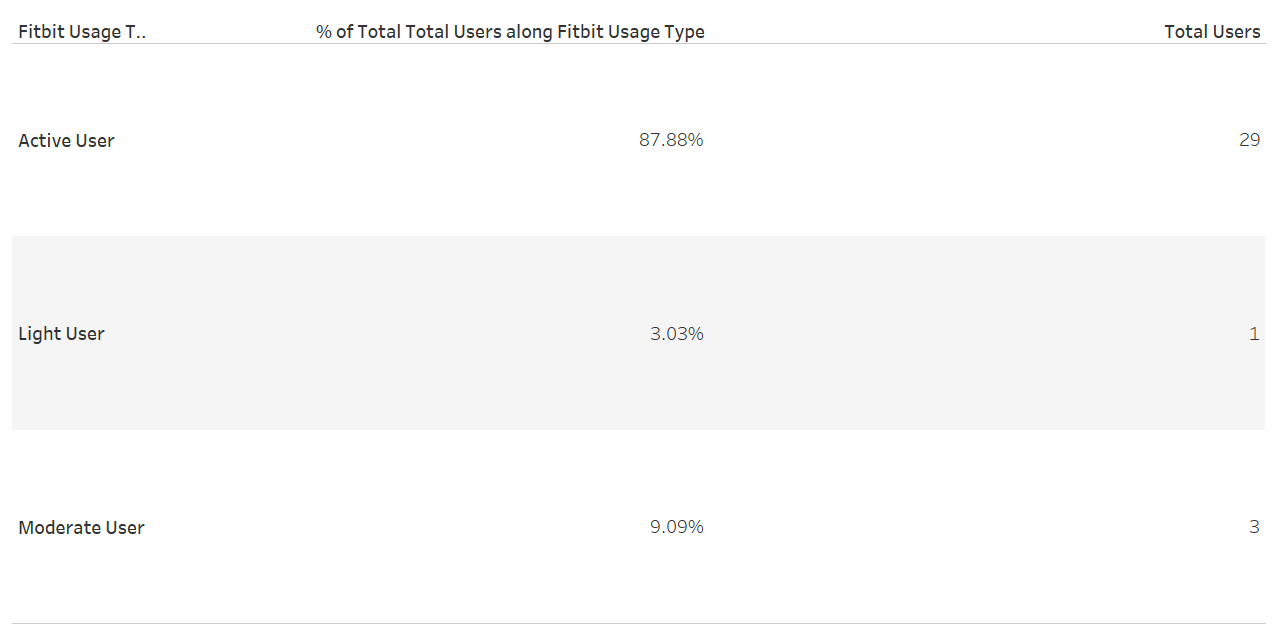
So we have 87% percent of active users and 9% of moderate Users and only 3% of light users


Next, I wanted to take a closer look at the MIN, MAX, & AVG of total steps, total distance, calories and activity levels by Id.<a id="userusageofwearbles"></a>

3. **how much Time Wearing Fitbit daily?**

In [ ]:
--How many hours a day users use their fitbit on average by weekday?
SELECT DISTINCT Id,
       ROUND(Avg(VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes)/60, 2) AS Hours_of_using_fitbit_daily
FROM `bellabeats-case-study-400103.case_Study.DailyActivity` da
GROUP BY id
order by Hours_of_using_fitbit_daily DESC,id;

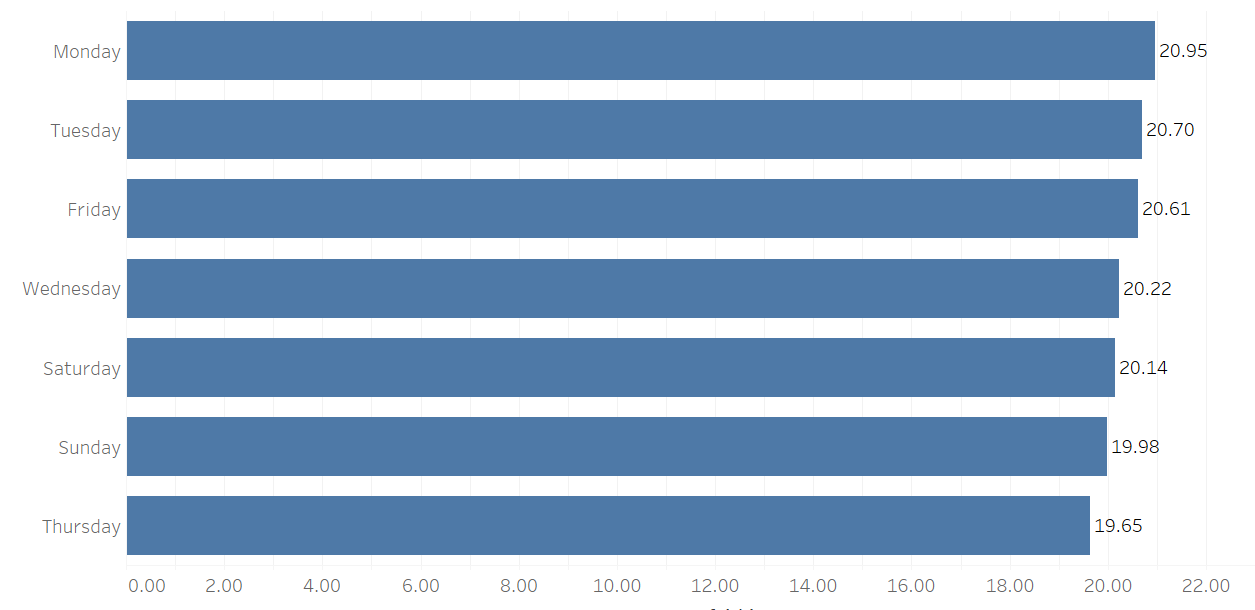
Number Of hours used Per Day Peaks on Monday with almost 21 hours a day, and it decreases to 19.6h on Thursday

4. **Users Summary Averages,Max, and MIN values**

In [ ]:

--each user summary data (min,max,avg):
SELECT Id,
MIN(TotalSteps) AS Min_Total_Steps,
MAX(TotalSteps) AS Max_Total_Steps, 
AVG(TotalSteps) AS Avg_Total_Stpes,
MIN(TotalDistance) AS Min_Total_Distance, 
MAX(TotalDistance) AS Max_Total_Distance, 
AVG(TotalDistance) AS Avg_Total_Distance,
MIN(Calories) AS Min_Total_Calories,
MAX(Calories) AS Max_Total_Calories,
AVG(Calories) AS Avg_Total_Calories,
MIN(VeryActiveMinutes) AS Min_Very_Active_Minutes,
MAX(VeryActiveMinutes) AS Max_Very_Active_Minutes,
AVG(VeryActiveMinutes) AS Avg_Very_Active_Minutes,
MIN(FairlyActiveMinutes) AS Min_Fairly_Active_Minutes,
MAX(FairlyActiveMinutes) AS Max_Fairly_Active_Minutes,
AVG(FairlyActiveMinutes) AS Avg_Fairly_Active_Minutes,
MIN(LightlyActiveMinutes) AS Min_Lightly_Active_Minutes,
MAX(LightlyActiveMinutes) AS Max_Lightly_Active_Minutes,
AVG(LightlyActiveMinutes) AS Avg_Lightly_Active_Minutes,
MIN(SedentaryMinutes) AS Min_Sedentary_Minutes,
MAX(SedentaryMinutes) AS Max_Sedentary_Minutes,
AVG(SedentaryMinutes) AS Avg_Sedentary_Minutes
From `bellabeats-case-study-400103.case_Study.DailyActivity`
Group BY Id;

Now let's narrowit down to just the averages of the different types of minutes by Id.

In [ ]:
--narrowing it to avgs
SELECT 
AVG(da.TotalSteps) AS AvgSteps, 
Round(AVG(da.TotalDistance),2)        AS AvgDistance, 
Round(AVG(da.Calories),2)             AS AvgCalories, 
Round(AVG(da.VeryActiveMinutes),2)    AS AvgVeryActiveMin, 
Round(AVG(da.FairlyActiveMinutes),2)  AS AvgFairlyActiveMin, 
Round(AVG(da.LightlyActiveMinutes),2) AS AvgLightlyActiveMin, 
Round(AVG(da.SedentaryMinutes),2)     AS AvgSedentaryMin,  
Round(AVG(s.TotalMinutesAsleep),2)    AS AvgMinAsleep, 
Round(AVG(s.TotalTimeInBed),2)        AS AvgTimeInBed, 
From `bellabeats-case-study-400103.case_Study.DailyActivity` da
join `bellabeats-case-study-400103.case_Study.SleepDay` s
ON da.id=s.id


![Screenshot 2023-10-06 22504q5.png](<attachment:Screenshot 2023-10-06 22504q5.png>)
![Screenshot 2023-10-06 225109q.png](<attachment:Screenshot 2023-10-06 225109q.png>)

Here are some averages of the dataset

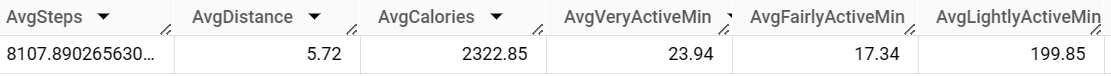
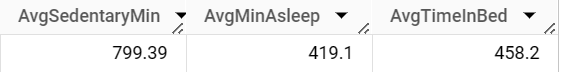

5. **what are Intensities Averages?**

In [ ]:
--average active minutes intensities by weekday
SELECT 
Round(avg(VeryActiveMinutes),2) AS Avg_Very_Active_Minutes,
Round(avg(FairlyActiveMinutes),2) AS Avg_Fairly_Active_Minutes,
Round(avg(LightlyActiveMinutes),2) AS Avg_Lightly_Active_Minutes,
Round(avg(SedentaryMinutes),2) AS Avg_Sedentary_Minutes,
FROM `bellabeats-case-study-400103.case_Study.DailyActivity`

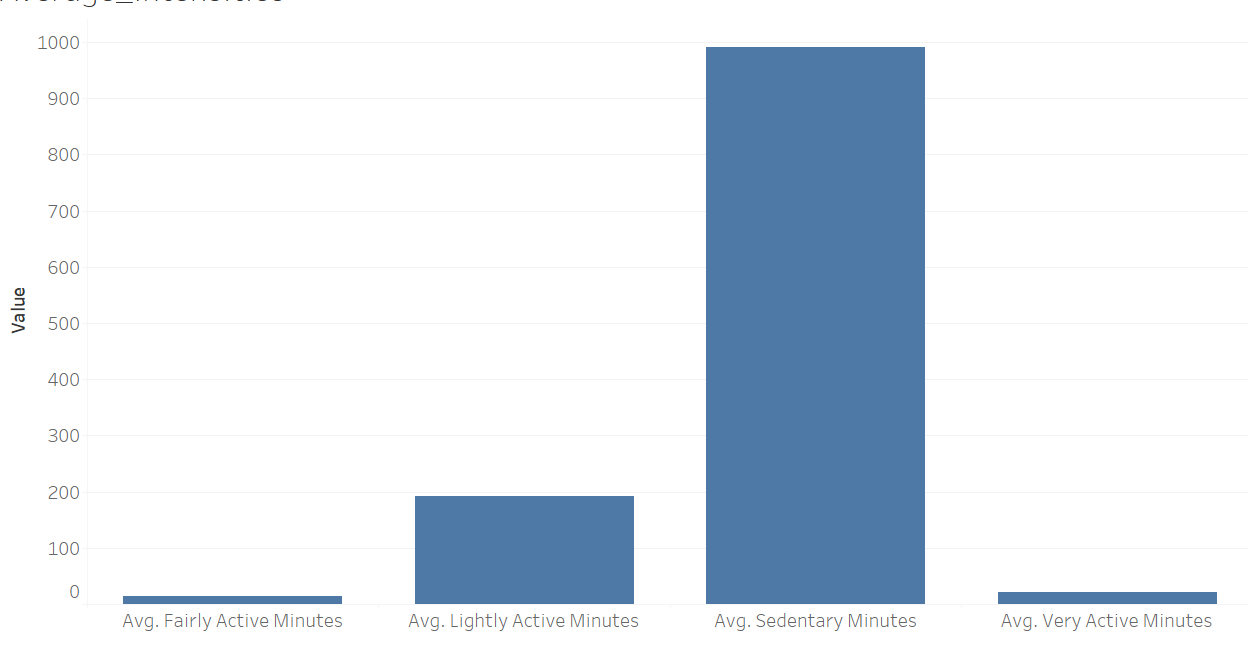

Here isa visualization of it on tableau done by inserting custom SQL insert and join to the whole dataset

And here is a deeper dive to check intensities by weekday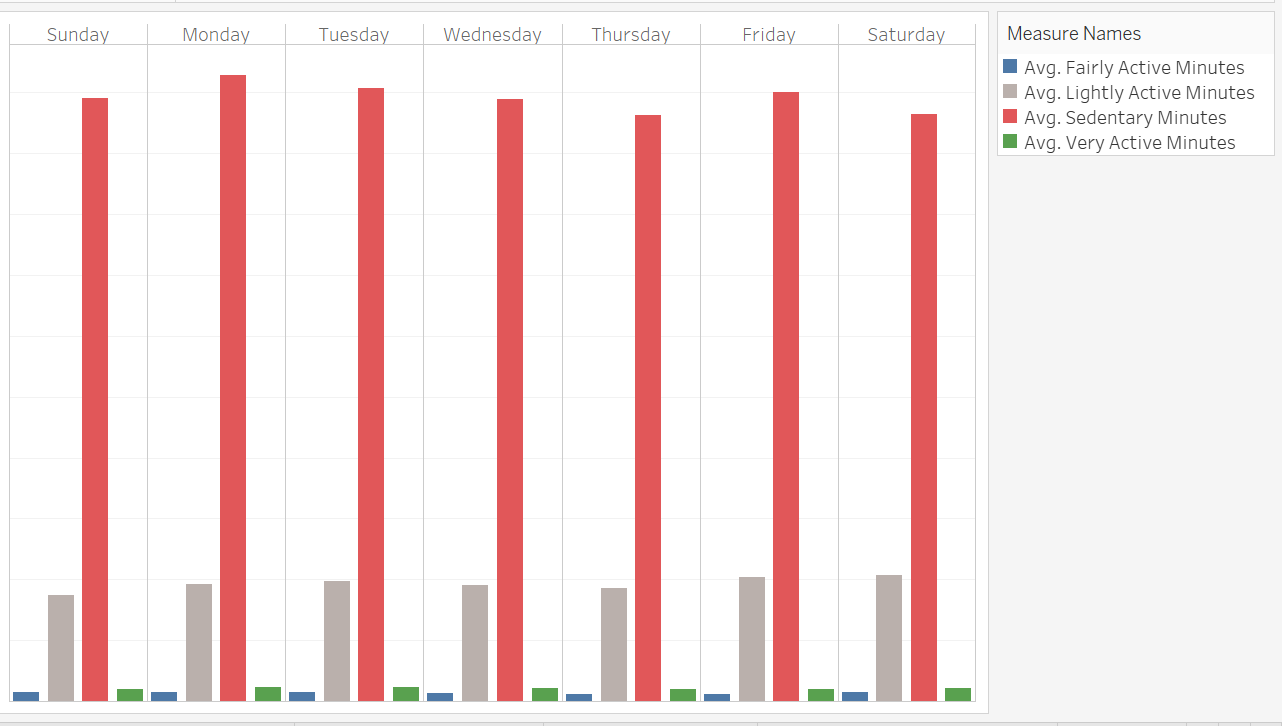
now we can see clearly that sedantry minutes are the dominant here ,folowed by LightlyActive minutes and then FairlyActive and VeryActive which is expected, people dont actually spend the whole day being active

6. **Steps Analysis**

In [ ]:
--average steps and distance by weekday
SELECT Weekday,
ROUND (avg(TotalSteps), 2) AS Average_Total_Steps,
ROUND (avg(TotalDistance), 2) AS Average_Total_Distance,
FROM `bellabeats-case-study-400103.case_Study.DailyActivity`
GROUP BY Weekday
ORDER BY Average_Total_Steps DESC;

and this is a visualization of it on Tableau ,I dragged Avg(totalSteps) to columns, and Weekday field which i created before on Excel to the rows so this is the average distance and steps by weekday

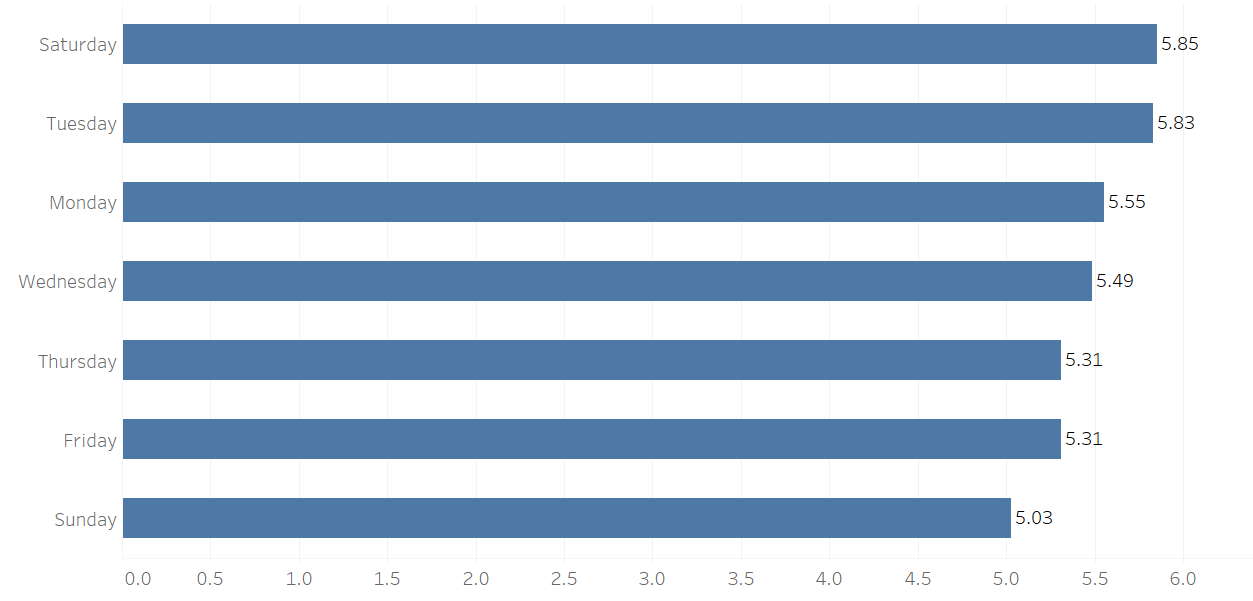

So maximum average steps are 5.8 km  on Saturday at which is probably the first holiday day on the weekend and the least average is 5km on sunday which is the following day perior to going to work again!

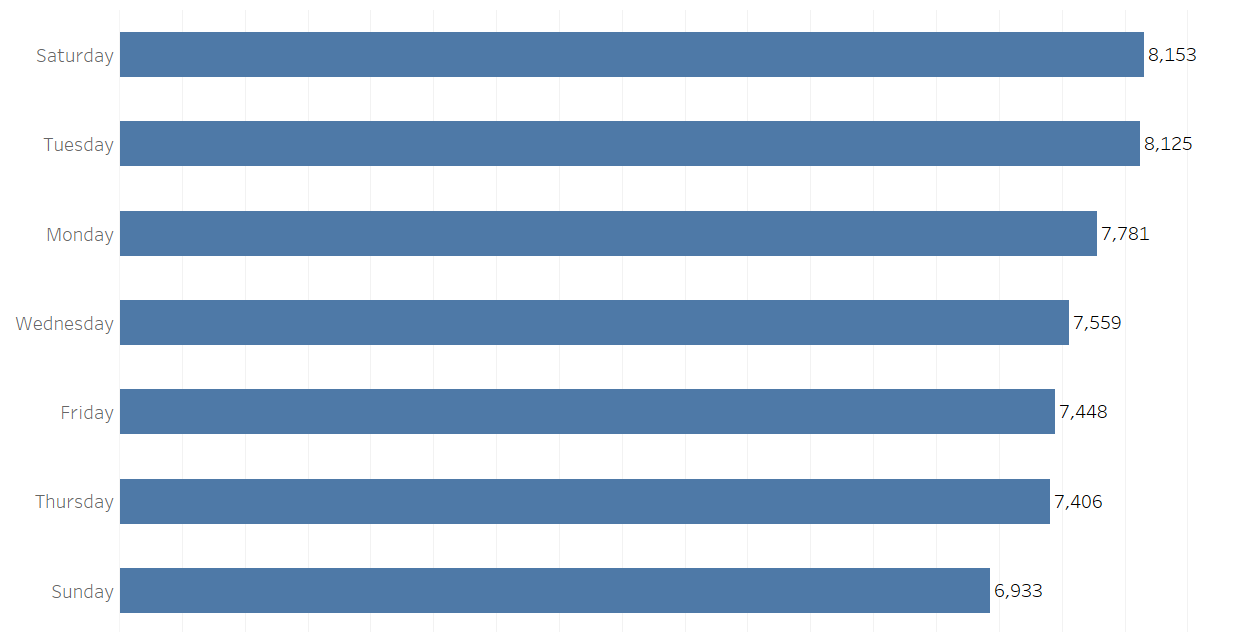

and here is to make sure by steps, steps average Peaks on saturday and the lowest step average is on sunday probably for reasons related to holidays,Steps peak on saturday with 8153 steps and decrease to 6933 step on sunday 


* CDC
The CDC(Center for Disease Control Prevention) Recommends 150 minutes of Physical Activity per Week, so let's sum the averages of VeryActive and lightlyActive and FairlyActive to see if it will meet the CDC recomendations
7. **does user activities meetsCDC Reccomendations?**

In [ ]:
-- user ativity and meeting CDC(Center for Disease Control Prevention) requirements

SELECT DISTINCT Id,
round(avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes),2) AS Total_Avg_Active_Minutes,
round(avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes)+ avg(SedentaryMinutes),2) AS Total_Avg_using_Minutes,
ROUND(((avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes)) /(avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes)+ avg(SedentaryMinutes)))*100, 2) AS Activity_using_ratio_AVG,
CASE 
WHEN avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes) >= 150 THEN 'Meets CDC Recommendation'
WHEN avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes) <150 THEN 'Does Not Meet CDC Recommendation'
END CDC_Recommendations
FROM `bellabeats-case-study-400103.case_Study.DailyActivity`
GROUP BY Id
order by Activity_using_ratio_AVG DESC;

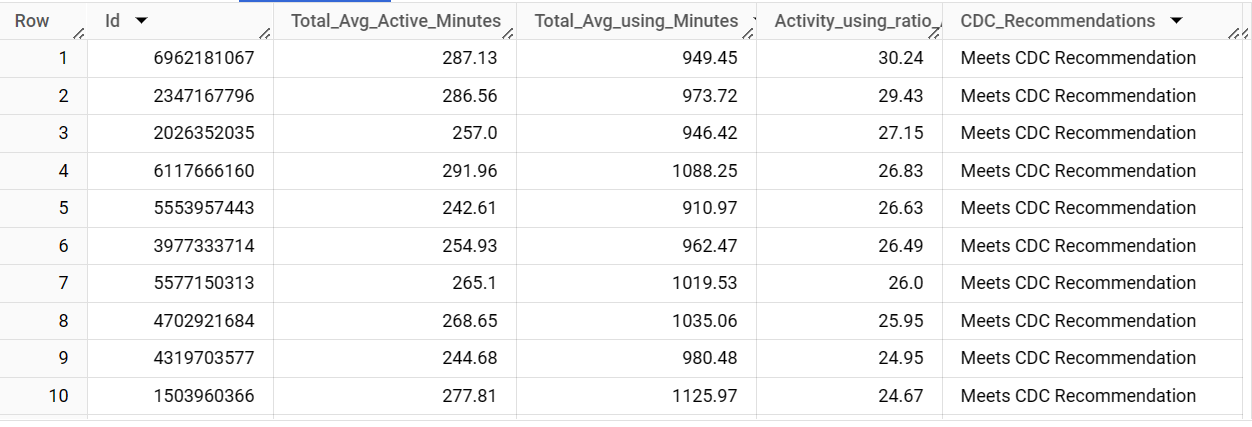

In [ ]:
SELECT count(id),CDC_Recommendations
FROM(
SELECT DISTINCT Id,
round(avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes),2) AS Total_Avg_Active_Minutes,
round(avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes)+ avg(SedentaryMinutes),2) AS Total_Avg_using_Minutes,
ROUND(((avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes)) /(avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes)+ avg(SedentaryMinutes)))*100, 2) AS Activity_using_ratio_AVG,
CASE 
WHEN avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes) >= 150 THEN 'Meets CDC Recommendation'
WHEN avg(VeryActiveMinutes) + avg(FairlyActiveMinutes) + avg(LightlyActiveMinutes) <150 THEN 'Does Not Meet CDC Recommendation'
END CDC_Recommendations
FROM `bellabeats-case-study-400103.case_Study.DailyActivity`
GROUP BY Id
order by Activity_using_ratio_AVG DESC) subquery
Group BY CDC_Recommendations


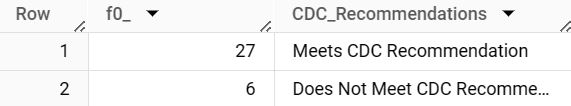

So, 27 Meets CDC recomendation while 6 doesnt meet CDC reccomendations



### 4.2 Calories and steps  <a id="CaloriesAndSteps"></a>
I am going to divide users according to their step count

* 5000  and lower THEN 'Inactive'
* Between 5000 AND 7499 THEN 'Low Active User'
* Between 7500 AND 9999 THEN 'Average Active User'
* Between 10000 AND 12499 THEN 'Active User'
* more than 12500 THEN 'Very Active User'

8. **how many users User Types by Total Steps?**

In [ ]:
--segmetnting users by steps
SELECT User_Type, COUNT (*) AS User_Count
FROM (
  SELECT Id,
  round(avg(TotalSteps),2) AS Avg_Total_Steps,
  CASE
  WHEN avg(TotalSteps) < 5000 THEN 'Inactive'
  WHEN avg(TotalSteps) BETWEEN 5000 AND 7499 THEN 'Low Active User'
  WHEN avg(TotalSteps) BETWEEN 7500 AND 9999 THEN 'Average Active User'
  WHEN avg(TotalSteps) BETWEEN 10000 AND 12499 THEN 'Active User'
  WHEN avg(TotalSteps) >= 12500 THEN 'Very Active User'
  END User_Type
  FROM `bellabeats-case-study-400103.case_Study.DailyActivity`
  GROUP BY Id)
  GROUP BY User_Type 


after visualizing it on Tableau 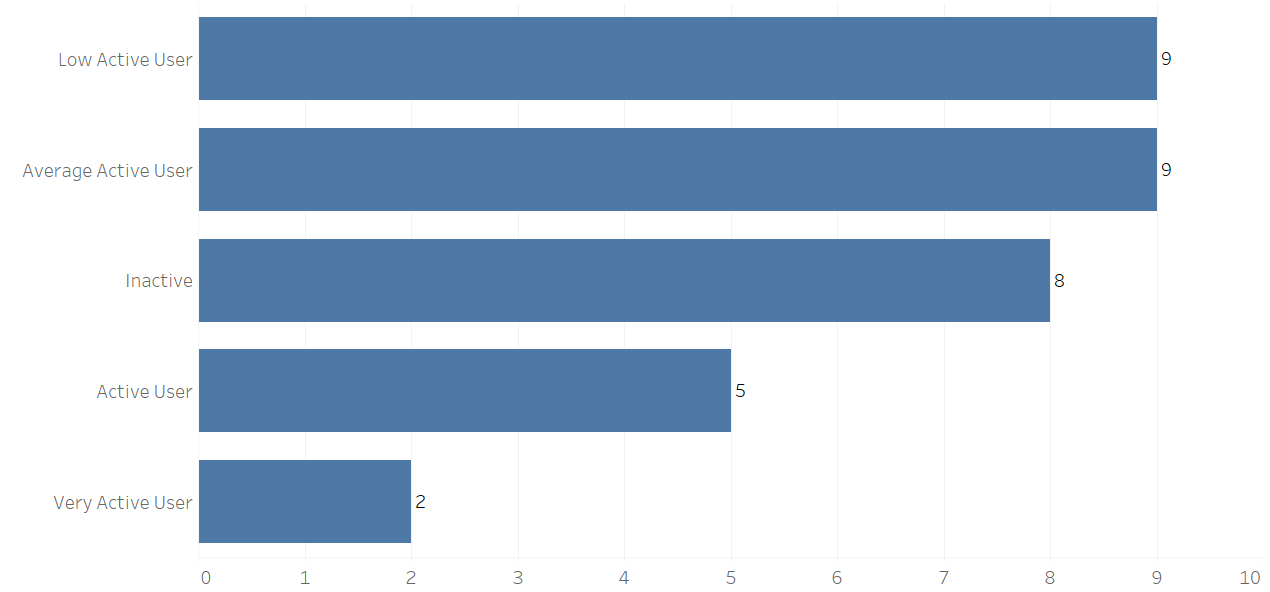
So here we know that lightlyActive Users are the most which is expected , followed by average users and then inactive users
so we have 9 users who is inactive and 8 low acitve users, so we have 52% of the users lower then 7500 steps goal on average and if we added Average Active Users who are 9 ,so we will have 79% of them did not hhit the 10,000 step goal

9. **How Calories And Steps coerelate?**

In [ ]:
--total Calories,Steps,and active minutes by user 
SELECT Id, 
Sum(TotalSteps) AS Sum_total_steps,
SUM(Calories) AS Sum_Calories, 
SUM(VeryActiveMinutes + FairlyActiveMinutes+LightlyActiveMinutes) AS Sum_Active_Minutes
FROM `bellabeats-case-study-400103.case_Study.DailyActivity`
GROUP BY Id

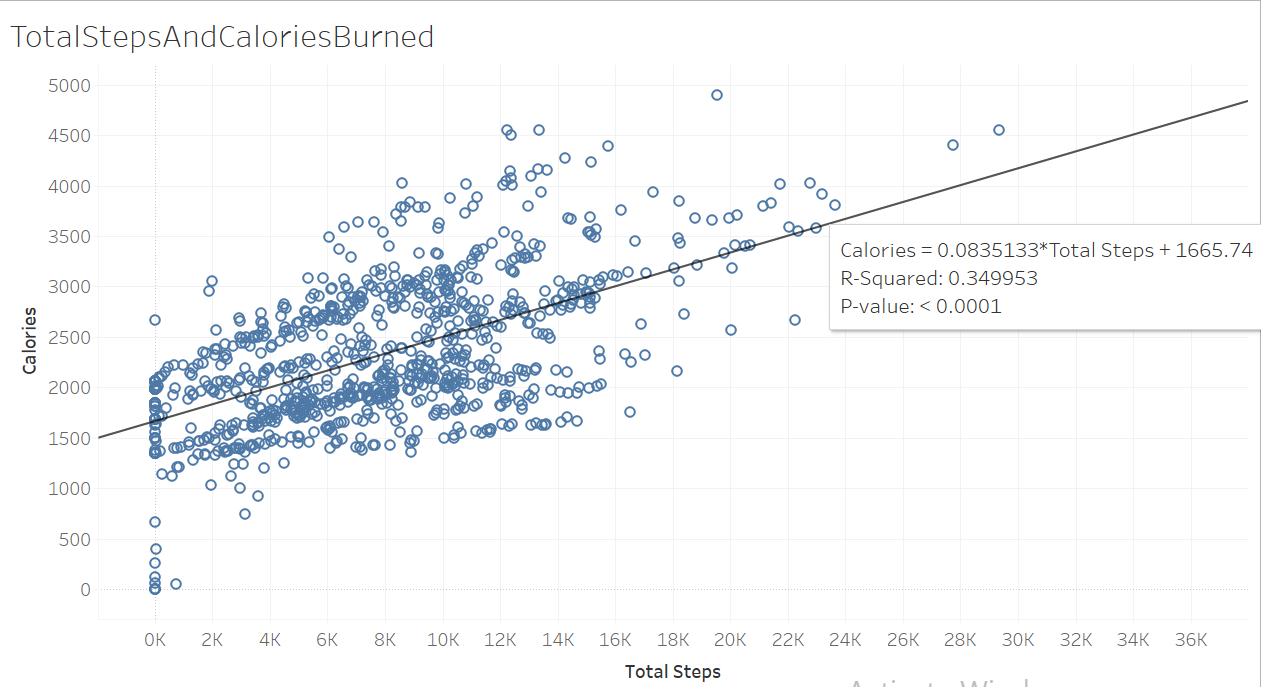
A linear trend model is computed for Calories given Total Steps.So it is significant at p <= 0.05.

10. **What is the Average Steps Hourly?**

In [ ]:
--average steps hourly 
SELECT 
Time_hour_,
AVG(StepTotal) AS Total_Steps_By_Hour
FROM `bellabeats-case-study-400103.case_Study.HourlyActivity` 
GROUP BY Time_hour_
ORDER BY Total_Steps_By_Hour DESC;

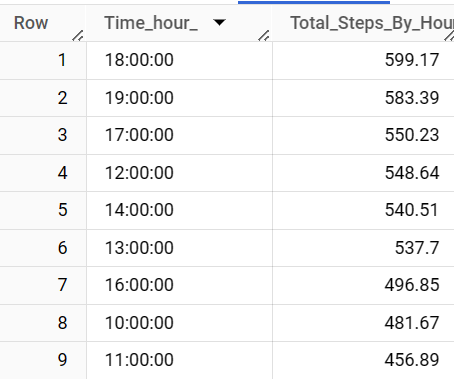

So people tend to walk more from 17:00  - 19:00 which is about the time of sunset

11.  **When do People Tend To Workout or walk More?**
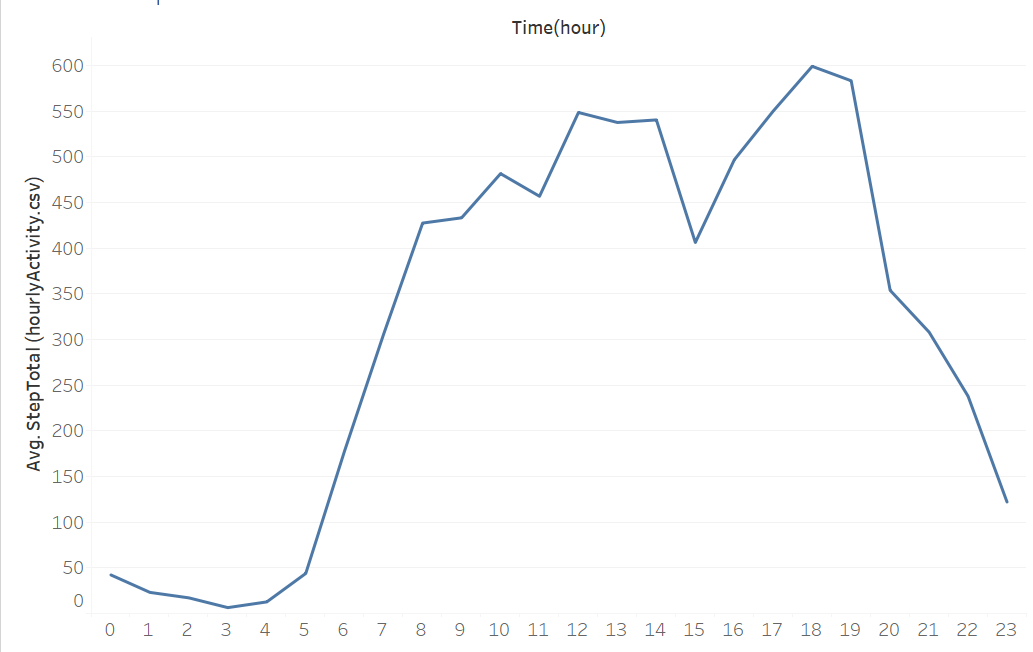
I can Notice that it is jut abou the same but in a time-series graph that shows average steps  at each hour, I tried to put Average intensities each hour instead of steps to notice times that people workout more,and I noticed it is about the same

In [ ]:
--average steps hourly taking days into account(highest hour in the week)
SELECT ha.Time_hour_,da.Weekday,
AVG(ha.StepTotal) AS Total_Steps_By_Hour,
FROM `bellabeats-case-study-400103.case_Study.HourlyActivity` ha
join`bellabeats-case-study-400103.case_Study.DailyActivity`  da
on ha.Weekday = da.Weekday 
GROUP BY Time_hour_,da.Weekday
ORDER BY Total_Steps_By_Hour DESC;

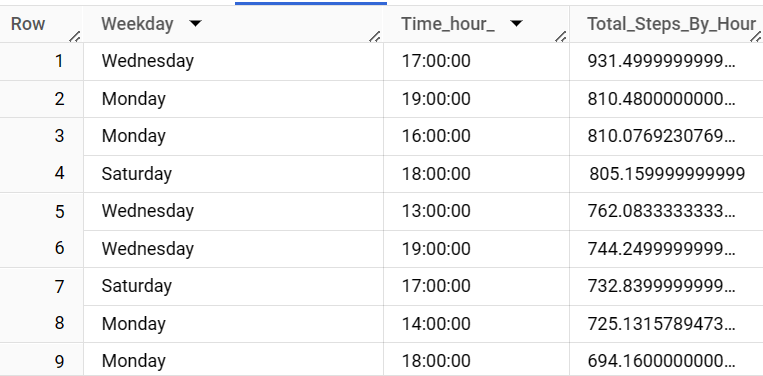
so,Wednsday at 17:00 (5:00 PM) is the highest hour throughout the week followed by monday at 19:00 and 16:00

### 4.3 Sleep Analysis      <a id="SleepAnalysis"></a>


In [ ]:

--how many users tracked sleep
SELECT count(distinct Id)
FROM `bellabeats-case-study-400103.case_Study.SleepDay`


So 24 user out of the 33 is tracking their sleep using fitbit tracker

12. **How much sleep Does Users have Daily?**

In [ ]:
--which day of the week users sleep most
SELECT 
Weekday,
AVG(TotalMinutesAsleep)/60 AS AVG_hours_Asleep 
FROM `bellabeats-case-study-400103.case_Study.SleepDay`
GROUP BY weekDay 
ORDER BY AVG_Hours_Asleep

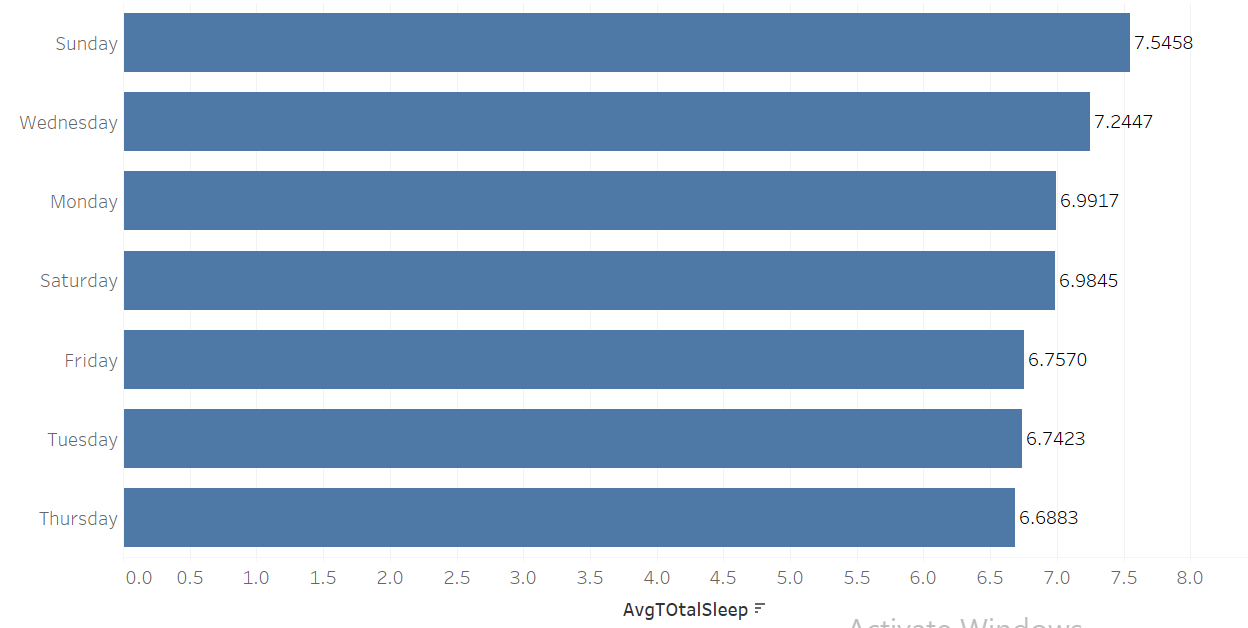

by checking the time users sleep , it is 00:00 for all users which might not be accurate but considering this, Users are sleeping the most on sunday at 00:00 (whcih is perior to sunday holiday) adn they sleep for an average of 7.5h and the least on thursday with average of 6.7h approximately 

13. **Does Sleep and steps?**

In [ ]:
-- user summary steps and calories burned and sleep relationship
SELECT a.Id,
Round(avg(a.TotalSteps),2) AS AvgTotalSteps,
Round(avg(a.Calories),2) AS AvgCalories,
Round(avg(s.TotalMinutesAsleep),2) AS AvgTotalMinutesAsleep,
FROM `bellabeats-case-study-400103.case_Study.DailyActivity` AS a
INNER JOIN `bellabeats-case-study-400103.case_Study.SleepDay` AS s ON a.Id=s.Id
GROUP BY a.Id

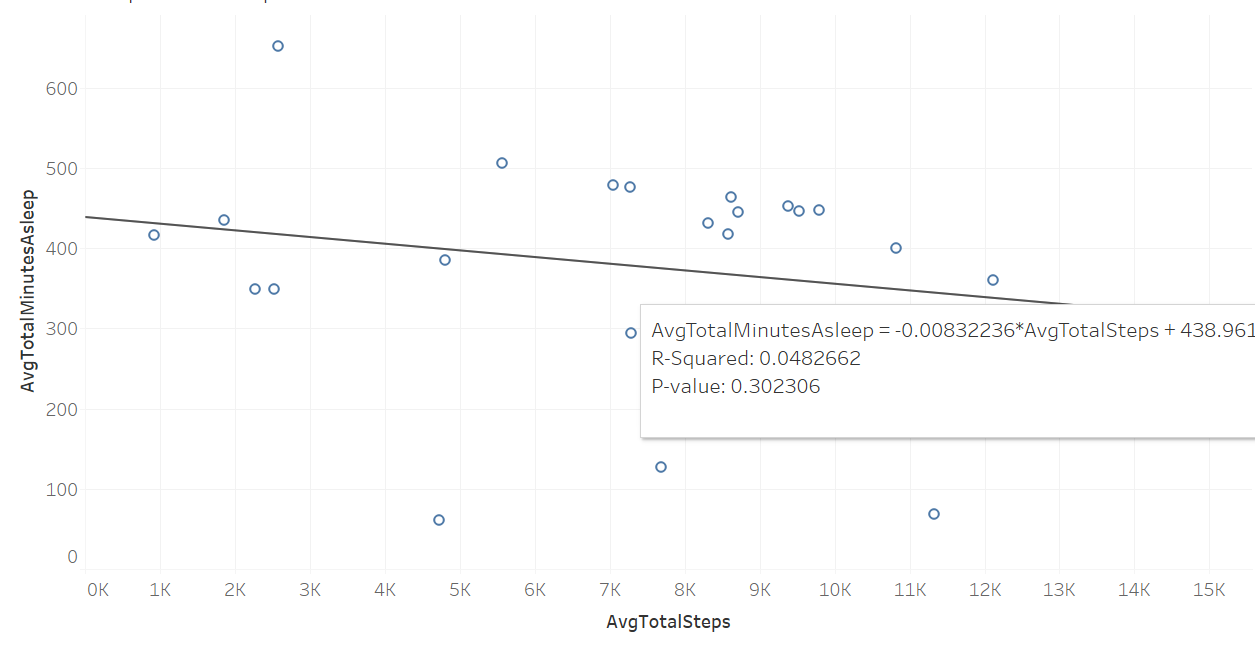

There is no direct relation between sleep and steps, as the p values > 0.05 here , so it is not statistically significant

14. **how much does users spend their time asleep of the total time they spend in bed?**

In [ ]:
--Average time asleep and inbed
SELECT Round(AVG(TotalMinutesAsleep),2) as TOTALMinutesAsleep,
       Round(AVG(TotalTimeInBed),2) as TotalMinutesinbed, 
       Round(AVG(TotalMinutesAsleep)/AVG(TotalTimeInBed)*100,2) as sleep_inbed_Ratio
FROM `bellabeats-case-study-400103.case_Study.SleepDay` 

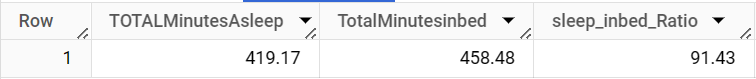

According to this, users are spending 91% of teir time in bed actually asleep which is about 40 minutes

15. **Does Users have Enough Sleep?**

In [ ]:
-- Does users have enough sleep?
SELECT count(id),
Case when  AVG_hours_Asleep < 7 then "enough sleep"
     when  AVG_hours_Asleep >7 then " not enough sleep"
End Sleep
FROM(
SELECT Distinct Id,
AVG(TotalMinutesAsleep)/60 AS AVG_hours_Asleep 
FROM `bellabeats-case-study-400103.case_Study.SleepDay`
GROUP BY Id
ORDER BY AVG_Hours_Asleep desc) subquery
GROUP BY Sleep


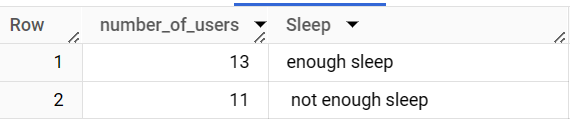

So about 48% of users didi not have enough sleep

16. Wieght logging

In [ ]:
-- how many logged their weight
SELECT count(DISTINCT id)
FROM `bellabeats-case-study-400103.case_Study.WeightLog`

Users who logged their weight are just 8 users which is less than 25% of the sample, so i a going to ignore this part

## 5. Act Phase  <a id="act"></a>

### Conclusion & Reccomendations

Bellabeats is a women centric company,the company currently offers different devices for tracking water intake, activity and steps, and stress, they have an app so the users can see their health data, in this analysis , there was some limitaions such as 
* the 30 days time frame might not be enough to spot more trends and patterns
* Bellabeat is women centric however, the dataset doesnt include gender in their data
* 33 users might not be enough sample, I would recommend using a larger sample size if possible to increae the confidence interval. Since the data utilized in this case study did not include demographic information, I'm unable to give a more detailed recommendaion or ensure there was no sampling bias

**My Reccomendations**
1. in terms of marketing I think Bellabeats should look into using their own marketing and user data or conduct their own data collection to gain further insights 
2. For the app I would Reccomend the following
   * through the analysis I  discovered that 9% lightly used it and 35 moderately used it , so I think a notification that remind users to  charge it at the end of the day is going to be useful and will make people use the products more
   * I reccomend making hourly notifictions that helps people get over 12,000 steps with warnings for how much they are behind and with suggestions for how to obtain those steps (ie: walk to get lunch, walk while talking on the phone, take the stairs instead of the elevator, park your car a little farther in the parking lot at the grocery store...) I can see that users do not even reach 10k steps a day, However, if we look at an hourly breakdown, we can see that people have certain hours during the day that they get much less steps (in the morning until 11 am, around 3pm, and after 7pm), and more stps from 5 PM to 7PM  Also, people might have a hard time calculating the number of steps of a day into an hourly goal that could be more manageable. If people know they need about 1000 steps every hour from 8-8 it might help and another notification that reminds the user to start their walk or workout if the app notices that the user hasn't begun to do so at their usual time of increased steps.
   * It may be beneficial to help users increase their sleep time by sending a notification to 'wind down for sleep' at a certain time based off ther sleep habits as 485 of them does not have enough sleep.
3. for marketing 
   * I reccomend that Bellabeat products should be marketed to customers who either already possess a tracker or have an interest in wellness or health education. They may attract customers who already wear a device to switch to a Bellabeat product by emphasizing its distinctive features as a device designed for women with more specific insights.
   * Customers who already have a tracker or are interested in wellness or health knowledge would be the ideal target market for Bellabeat products. By highlighting the product’s uniqueness as a woman-focused device with special features, they may persuade customers who already use a wearable to switch to a Bellabeat product for more tailored insights.